# Sub-task 4.1

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Read in reduced wine quality dataset

In [2]:
reduced_df = pd.read_csv('Downloads/winequality-red-reduced.csv')
reduced_df

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2


Print out correlation matrix of the dataset

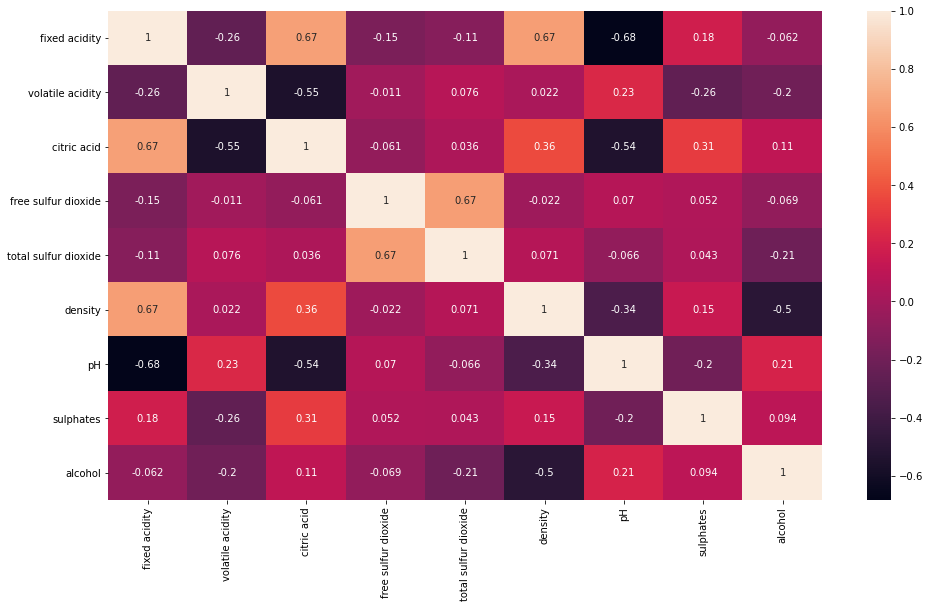

In [3]:
fig = plt.figure(figsize = (16,9))
corrMatrix = reduced_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Apply SparsePCA to our dataset with **n_components** = 3 and **alpha** = 5. This will project our original data onto a three-dimensional subspace

In [4]:
pca = SparsePCA(n_components=3, random_state=0, alpha=5)

In [5]:
pca.fit(reduced_df)
principalComponents = pca.transform(reduced_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.describe()

,principal component 1,principal component 2,principal component 3
count,1.599000e+03,1.599000e+03,1.599000e+03
mean,6.674947e-15,1.959380e-15,-4.771390e-16
std,3.257012e+01,1.035659e+01,1.724313e+00
min,-4.007116e+01,-5.556938e+01,-7.506611e+00
25%,-2.422523e+01,-5.074335e+00,-8.721892e-01
50%,-8.385845e+00,1.856358e+00,4.153051e-01
75%,1.538156e+01,8.787051e+00,1.207931e+00
max,2.401246e+02,1.472765e+01,3.683216e+00


Plot the projection of our dataset into three-dimensional subspace

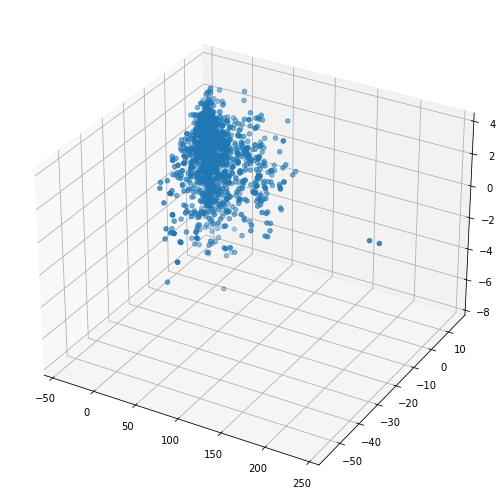

In [6]:
fig = plt.figure(figsize = (16,9))
ax = plt.axes(projection='3d')

ax.scatter3D(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3']) 

We can see from the graph that there are couples of outlier in our projection and the scale of 3 dimensions are different from each other.

The columns of the  following dataframe contain the eigenvectors associated with the three principal components. Each element represents a loading, namely how much (the weight) each original variable contributes to the corresponding principal component.

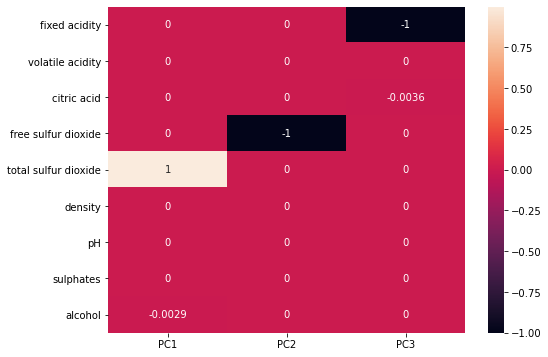

In [7]:
fig = plt.figure(figsize = (8,6))
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'], index=reduced_df.columns)
sns.heatmap(loadings, annot=True)
plt.show()

Since we don't scale our data, principal components represent the directions of the data that explain a maximal amount of variance due to their scales such as free, total sulfur dioxide and fixed acidity contribute the most to 3 principal components. In PCA we are interested in the components that maximize the variance. If one feature (e.g density)  varies less than another (e.g total sulfure dioxide) because of their respective scales, PCA might determine that the direction of maximal variance more closely corresponds with the ‘total sulfure dioxide’ axis, if those features are not scaled.

Now we standardize the data

In [8]:
reduced_df_std = StandardScaler().fit_transform(reduced_df)
reduced_df_std = pd.DataFrame(reduced_df_std, index=reduced_df.index, columns=reduced_df.columns)

And apply PCA to our scaled data

In [9]:
pca.fit(reduced_df_std)
principalComponents_std = pca.transform(reduced_df_std)
principalDf_std = pd.DataFrame(data = principalComponents_std
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf_std.describe()

,principal component 1,principal component 2,principal component 3
count,1.599000e+03,1.599000e+03,1.599000e+03
mean,7.428565e-16,6.321380e-17,1.991319e-16
std,1.692139e+00,1.278996e+00,1.229949e+00
min,-5.838288e+00,-1.723536e+00,-4.424181e+00
25%,-1.044373e+00,-1.026856e+00,-7.456716e-01
50%,1.616055e-01,-2.965546e-01,2.461774e-01
75%,1.318192e+00,8.179142e-01,9.134362e-01
max,4.916357e+00,6.611222e+00,3.270700e+00


Plot the projection of our scaled dataset into three-dimensional subspace

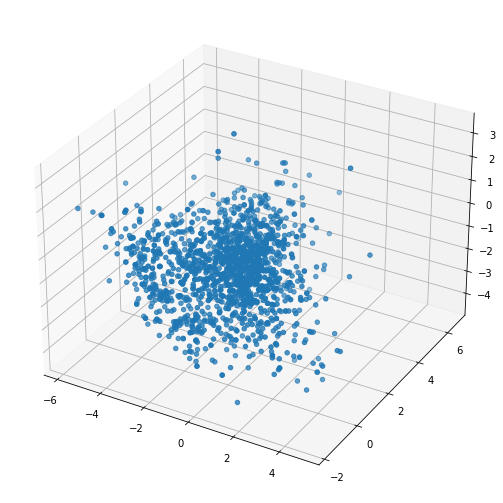

In [10]:
fig = plt.figure(figsize = (16,9))
ax = plt.axes(projection='3d')

ax.scatter3D(principalDf_std['principal component 1'], principalDf_std['principal component 2'], principalDf_std['principal component 3']) 

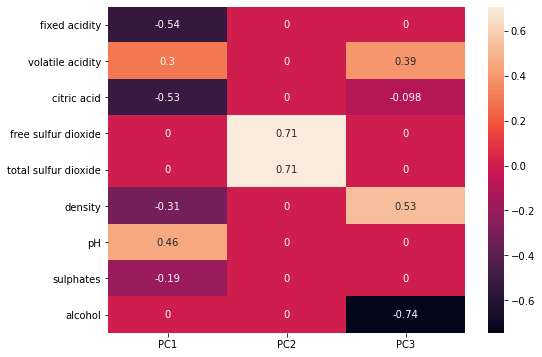

In [11]:
fig = plt.figure(figsize = (8,6))
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'], index=reduced_df_std.columns)
sns.heatmap(loadings, annot=True)
plt.show()

Result from the correlation matrix shows that total and free sulfur dioxide have high factor loading with component 2, while alcohol and density are associated with component 3. Other variable (e.g fixed acidity, citric acidity, pH,...) loading highly to component 1. This suggest that the non-quality aspects of this dataset could be modelled using three latent variables: acidity, sulphur dioxide and alcohol content. Notice that there are some variable that also is marginally important in other components, such as volatile acidity in component 3, indicate that there might be correlations between features. 

# Sub-task 4.2

Read in the full wine quality dataset

In [12]:
full_df = pd.read_csv('Downloads/winequality-red-full.csv')
full_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Standardazing the data

In [13]:
full_df_std = StandardScaler().fit_transform(full_df)
full_df_std = pd.DataFrame(full_df_std, index=full_df.index, columns=full_df.columns)

Apply PCA to our dataset with **n_components** = 3. This will project our original data onto a three-dimensional subspace

In [14]:
pca = PCA(n_components=3, random_state=0)

In [15]:
pca.fit(full_df_std)
principalComponents2 = pca.transform(full_df_std)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf2.describe()

,principal component 1,principal component 2,principal component 3
count,1.599000e+03,1.599000e+03,1.599000e+03
mean,2.101717e-16,-2.231555e-16,4.526988e-17
std,1.767235e+00,1.497760e+00,1.297680e+00
min,-5.202739e+00,-4.417032e+00,-3.456735e+00
25%,-1.300858e+00,-9.640728e-01,-8.819711e-01
50%,-1.809887e-01,1.243224e-01,-1.600797e-01
75%,1.052023e+00,9.973593e-01,7.595014e-01
max,8.259096e+00,5.156549e+00,7.590599e+00


We visualise the data in three dimensions

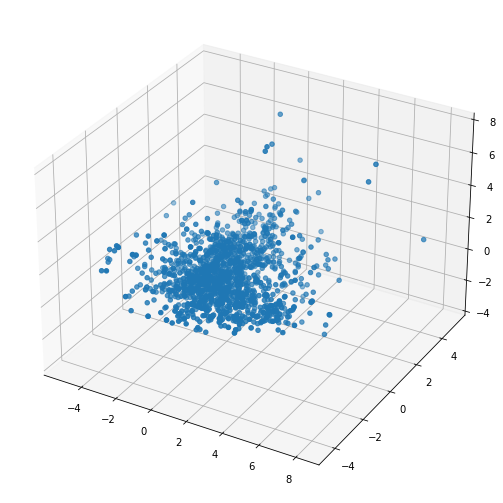

In [16]:
fig = plt.figure(figsize = (16,9))
ax = plt.axes(projection='3d')

ax.scatter3D(principalDf2['principal component 1'], principalDf2['principal component 2'], principalDf2['principal component 3']) 

Print out the explained variance of the projection. From the below output, we can observe that the principal component 1 holds **26%** of the information while the principal component 2 and 3 holds only **18.6%** and **14%** of the information respectively. Also, the other point to note is that while projecting 12-dimensional data to a 3-dimensional data, **41,3%** information was lost. We need to increment the number of components to capture all the information of the dataset.

In [17]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.26009731 0.1868235  0.14024331]
0.5871641193160618


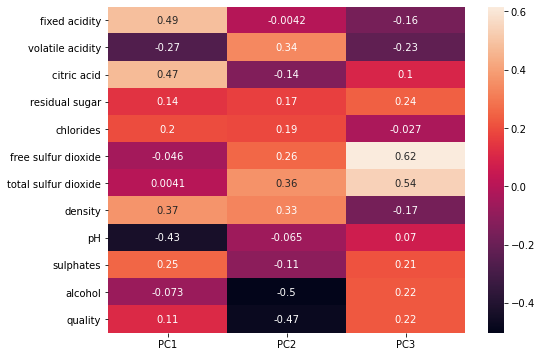

In [18]:
fig = plt.figure(figsize = (8,6))
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'], index=full_df.columns)
sns.heatmap(loadings, annot=True)
plt.show()

Methodology to determine the appropriate minimum dimensionality to project the data to:

We don't set the **n_components** parameter in **PCA()** class. If we do not specify the value, all components are kept. In our example, this exactly the same as **n_components** = 12 as we have 12 features

In [23]:
pca_full = PCA(random_state=0)

In [24]:
pca_full.fit(full_df_std)
principalComponents2_full = pca_full.transform(full_df_std)

We can plot the cumulative sum of variance to show the variance captured against the no. of components. Then **n_components** can be decided.

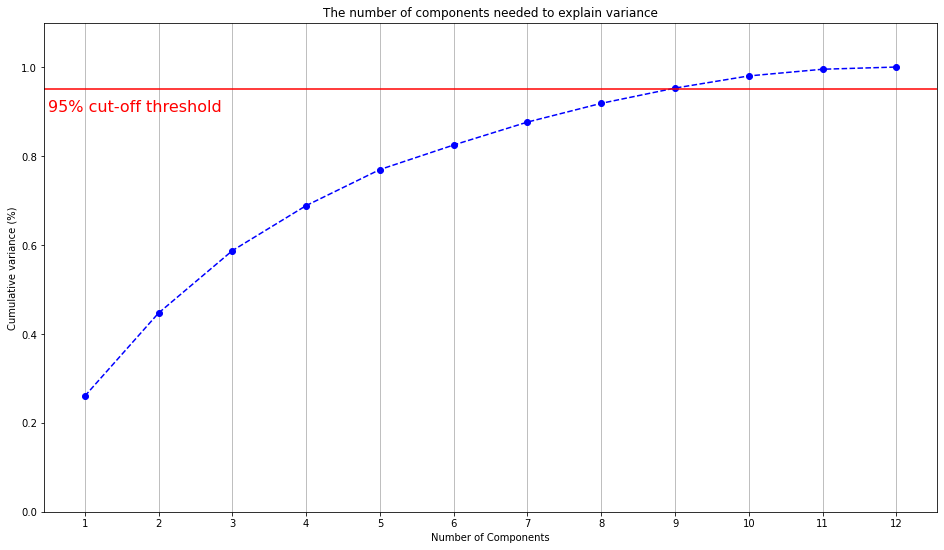

In [25]:
plt.rcParams["figure.figsize"] = (16,9)
fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
y = np.cumsum(pca_full.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Using the graph above, we can select the number of features based on how much variance needs to be explained. In this case, to get 95% of variance explained we need 9 principal components.

Another method to determine the number of component is to set the parameter **n_components** to the amount of variance that needs to be explained. For example, if **n_components** = 0.95, the algorithm will select the number of components while preserving 95% of the variability in the data.

In [26]:
pca_full = PCA(n_components=0.95, random_state=0)

In [27]:
pca_full.fit(full_df_std)
principalComponents2_full = pca_full.transform(full_df_std)

We print out the required number of components and its corresponding cummulative sum of variance

In [28]:
print(pca_full.n_components_)
print(sum(pca_full.explained_variance_ratio_))

9
0.9526953383954664
